# Computer Lab 1

The software [SageMath](https://www.sagemath.org) is an open-source (and free) computer algebra system that can be used to perform many calculations in mathematics.  Here, we will use it to make calculations in linear algebra.  Without further ado, let's just dive right into it.

Here is a snippet of code that should be self-explanatory:

In [1]:
A = matrix(2,2,[1,3,4,5])
B = matrix(2,2,[2,4,3,5])

In [2]:
A

[1 3]
[4 5]

In [3]:
B

[2 4]
[3 5]

One can perform the basic algebraic operations on matrices as follows:

In [4]:
A + B

[ 3  7]
[ 7 10]

In [5]:
A * B

[11 19]
[23 41]

In [6]:
B * A

[18 26]
[23 34]

Now, it is your turn to play with Sage.  Consider the following two matrices:

$$C = \begin{pmatrix}1 & 2 & 3 \\ 4 & 5 & 6 \end{pmatrix} \text{ and } D = \begin{pmatrix} -3 & 4\\ 5 & 6 \end{pmatrix} $$

Based on the examples above, enter those two matrices in SageMath in the cell below.

Try to calculate $C + D$ in the cell below, and notice what happens.

As you noticed, SageMath is returning an error message, since these two matrices cannot be added.  On the other hand, go ahead and calculate $D \cdot C$ in the cell below. 

You can also calculate powers of matrices.  For instance:

In [7]:
A^3

[ 85 129]
[172 257]

One can check if two matrices are the same by using the `==` symbol:

In [8]:
A == B

False

In [9]:
A == A

True

For instance, we can ask SageMath:

In [10]:
(A+B)^2 == A^2 + 2*A*B + B^2

False

Indeed, on one hand we have

In [11]:
(A+B)^2

[ 58  91]
[ 91 149]

and on the other hand, we have

In [12]:
A^2 + 2*A*B + B^2

[ 51  84]
[ 91 156]

But we already knew that, since $A \cdot B \neq B \cdot A$ as we calculated above.  SageMath can be used to check if a square matrix is invertible:

In [13]:
A.is_invertible()

False

Wait, what?  

What happened in this last example is that when we entered the matrix $A$, we did not specified what numbers we are working with, so SageMath thinks the entries in this matrix are integers.  But for that command to work properly, we have to tell SageMath what kind of numbers we are working with.  So far in this class, we have been working over $\mathbb{R}$, the *field* of real numbers.  That is why I am using the notation $M_{m \times n}(\mathbb{R})$ for the collection of all $m \times n$ matrices with *real* entries.  In fact, one can do linear algebra over any field, not just $\mathbb{R}$.  (I encourage you to go ahead and read on the notion of [field](https://en.wikipedia.org/wiki/Field_(mathematics)).)  We have used under the rugs a few properties of $\mathbb{R}$, but the main reason why it is a field is that every nonzero element has a multiplicative inverse.  The collection $\mathbb{Q}$ of all rational numbers is also a field, and so is the collection $\mathbb{C}$ of all complex numbers.  

Let's redefine the matrix $A$, but now we will tell SageMath that the entries are in $\mathbb{Q}$ (which is denoted simply by QQ in SageMath).  We work with $\mathbb{Q}$ here simply to avoid working with floating points and decimal expansions.

In [14]:
A = matrix(QQ,2,2,[1,3,4,5])
A

[1 3]
[4 5]

And let's check again if it is invertible:

In [15]:
A.is_invertible()

True

This time, we got the expected answer.  The inverse can also be calculated:

In [16]:
A^(-1)

[-5/7  3/7]
[ 4/7 -1/7]

We could double check our answer:

In [17]:
A * A^(-1)

[1 0]
[0 1]

and

In [18]:
A^(-1) * A

[1 0]
[0 1]

In class, we saw that a square matrix is invertible if and only if its determinant is nonzero.  The determinant of a square matrix can also be calculated:

In [19]:
A.determinant()

-7

Now go ahead and enter the matrix $$E = \begin{pmatrix}1 & 3 & 3 & -1 & 5\\-1 & 1 & 3 & -1 & 5\\8 & -7 & 5 & -1 & 100\\3 & 2 & -10 & -1 & 5\\-5 & 2 & 3 & -1 & 4 \end{pmatrix} $$ in SageMath in the cell below.

Calculate its determinant in the cell below.

Calculate its inverse in the cell below.

And calculate the $4$th power of $E$ in the cell below as well.

As you can see, SageMath can used to perform basic algebraic operations on matrices.  But it can also row reduce matrices.  For that, we have again to specify over which field we are working.  

In [20]:
C = matrix(QQ,2,3,[1,2,3,4,5,6])
C

[1 2 3]
[4 5 6]

In [21]:
C.rref()

[ 1  0 -1]
[ 0  1  2]

A matrix can be augmented of another matrix.  For instance, we augment the earlier matrix $A$ with the $2 \times 2$ identity matrix:

In [22]:
F = A.augment(identity_matrix(2))
F

[1 3 1 0]
[4 5 0 1]

As we know, if we row reduce this matrix, we should obtain the inverse instead of the identity matrix in the augmented part of the matrix:

In [23]:
F.rref()

[   1    0 -5/7  3/7]
[   0    1  4/7 -1/7]

and indeed, one has

In [24]:
A^(-1)

[-5/7  3/7]
[ 4/7 -1/7]

Go ahead and augment the matrix $E$ from above with the identity matrix.  Call the resulting matrix $G$.

Then, row reduce this augmented matrix $G$ to see if you get the same inverse as you calculated earlier.

Consider now the system of linear equations $$\begin{aligned}2x + 4y &= 2 \\x + 2y &= 1 \end{aligned}$$ There are many ways to solve this system of linear equations.  One way is as follows:

In [25]:
x,y = var('x,y')
solve([2*x + 4*y ==2, x + 2*y == 1],[x,y])

[[x == -2*r1 + 1, y == r1]]

You can also form the augmented matrix corresponding to the system of linear equations, and row reduce the matrix:

In [26]:
H = matrix(QQ,2,2,[2,4,1,2])
I = matrix(QQ,2,1,[2,1])
J = H.augment(I)
J.rref()

[1 2 1]
[0 0 0]

If we call our free variable r1, we get the same thing as in the previous calculation.

Now, go ahead and solve the system of linear equations $$\begin{aligned} -x_{2} - x_{3} + x_{4} &=0 \\x_{1} + x_{2} +x_{3} +x_{4} &= 6 \\2x_{1} + 4x_{2}+x_{3}-2x_{4} &= -1 \\ 3x_{1} + x_{2} - 2x_{3} + 2x_{4} &=3\end{aligned} $$

Linear algebra has many applications to computer science, social sciences, engineering, etc.  For now, let just look a simple one coming from [network theory](https://en.wikipedia.org/wiki/Network_theory#:~:text=In%20mathematics%2C%20computer%20science%20and,between%20their%20(discrete)%20components.).  A network can be represented by a graph which is just a collection of vertices and edges such as in the following example:

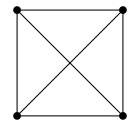

In the graph above (called the [complete graph](https://en.wikipedia.org/wiki/Complete_graph) on four vertices), there are four vertices and six edges.  In order to study the properties of a graph, one associates several matrices.  In order to do so, one has to label the vertices.  For the graph above, let's start with the top left vertex and label it $v_{1}$, then let's label the other vertices $v_{2}, v_{3}, v_{4}$ going in the clockwise direction.  The *adjacency* matrix associated to a graph is the matrix $A = (a_{ij})$, where $a_{ij} = 1$ if there is an edge connecting the vertex $v_{i}$ to the vertex $v_{j}$, and $a_{ij} = 0$ otherwise.

For the graph above, its adjacency matrix is $$\begin{pmatrix} 0 & 1 & 1 & 1 \\ 1 & 0 & 1 & 1 \\ 1 & 1 & 0 & 1 \\ 1 & 1 & 1 & 0 \end{pmatrix}$$

A path in a graph is a sequence of vertices that are connected via edges.  For instance, in the graph above one can look at the path $v_{1} \to v_{3} \to v_{4} \to v_{2}$ which is a path of length four, since there are four edges to construct the path.  Another example of a path of length $3$ from $v_{1}$ to $v_{2}$ is given by $v_{1} \to v_{4} \to v_{1} \to v_{2}$.  It is a theorem that the number of paths of length $m$ from the vertex $v_{i}$ to $v_{j}$ is the $(i,j)$ entry of the matrix $A^{m}$.  For instance, we calculate:

In [27]:
A = matrix(QQ,4,4,[0,1,1,1,1,0,1,1,1,1,0,1,1,1,1,0])
A^3

[6 7 7 7]
[7 6 7 7]
[7 7 6 7]
[7 7 7 6]

Therefore, there should be $7$ paths of length $3$ between $v_{1}$ and $v_{2}$.  We found two above.  Can you find the five remaining ones on a separate piece of paper?  (You don't have to turn this in.  But do it for yourself.)

Another matrix associated to a graph is the *degree* matrix.  The degree of a vertex is the number of edges connecting that vertex to any other one.  For instance, there are four edges coming into the vertex $v_{1}$ of the graph above, so the degree of $v_{1}$, denoted by ${\rm deg}(v_{1})$, is $3$.  In fact, one has ${\rm deg}(v_{i}) = 3$ for $i=1,2,3,4$.  The *degree* matrix associated to a graph is the diagonal matrix $D = (d_{ij})$, where $d_{ii} = {\rm deg}(v_{i})$.

For instance, the degree matrix of the graph above is $$\begin{pmatrix}3 & 0 & 0 & 0 \\ 0 & 3 & 0 & 0 \\0 & 0 & 3 & 0 \\ 0 & 0 & 0 & 3 \end{pmatrix}$$

The *Laplacian* matrix of the graph is $L = D - A$.  For the graph above, we calculate the Laplacian matrix:

In [28]:
D = matrix(QQ,4,4,[3,0,0,0,0,3,0,0,0,0,3,0,0,0,0,3])
L = D - A
L

[ 3 -1 -1 -1]
[-1  3 -1 -1]
[-1 -1  3 -1]
[-1 -1 -1  3]

A tree is a particular type of graphs that has no circuit as subgraphs. (A circuit is a circle with as many vertices as one would like on the circumference.)  A *spanning tree* of a graph is a subgraph that is a tree and which includes all vertices of the original graph.  For instance, the spanning trees of the graph above are:

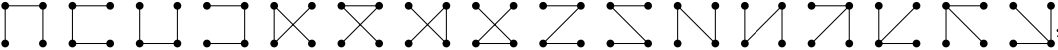

Thus, there are $16$ of them.  A famous [theorem](https://en.wikipedia.org/wiki/Kirchhoff%27s_theorem) states that if $\kappa$ denotes the number of spanning trees of a graph, then $${\rm adj}(L) = \kappa \cdot J,$$ where $J$ is the matrix consisting of $1$'s in each entry.

For instance, for the graph above, we have:

In [29]:
L.adjugate()

[16 16 16 16]
[16 16 16 16]
[16 16 16 16]
[16 16 16 16]

Consider now the following graph

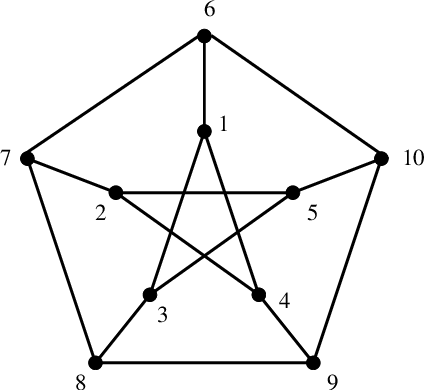

Go ahead and find its adjacency matrix in the cell below.  Call it $R$.

Then, calculate its degree matrix, and call it $S$.

At last, calculate its Laplacian matrix, and call it $T$.

How many paths of length $10$ are there between the vertex labeled $3$ and the vertex labeled $9$?  Use the next cell to perform the needed calculation.  Then, in the second cell right below, write down your answer.  Just the number suffice.

How many spanning trees does this graph has??  Again, perform your calculation in the cell below, and write down your answer in the second cell.